In [1]:
from tensorflow import keras
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors

plt.ion()

iris = np.loadtxt("iris.csv", delimiter=",")

In [2]:
def plotTwoFeatures(X, T, pred_func):
    if X.ndim != 2:
        raise ValueError('X be a matrix (2 dimensional array).')
    tp = False
    if X.shape[0] != 2 and X.shape[1] == 2:
        X = X.T
        tp = True
    if X.shape[0] != 2:
        raise ValueError('X must contain exactly 2 features.')

    # determine canvas borders
    mins = np.amin(X, 1);
    mins = mins - 0.1 * np.abs(mins);
    maxs = np.amax(X, 1);
    maxs = maxs + 0.1 * maxs;

    ## generate dense grid
    xs, ys = np.meshgrid(np.linspace(mins[0], maxs[0], 300),
                         np.linspace(mins[1], maxs[1], 300));

    # evaluate model on the dense grid
    try:
        Z = pred_func(np.c_[xs.flatten(), ys.flatten()].T);
    except:
        Z = pred_func(np.c_[xs.flatten(), ys.flatten()]);

    if tp:
        Z = Z.T
        T = T.T

    if Z.ndim > 1 and Z.shape[0] > 1:  # onehot? -> convert
        Z = Z.argmax(0)
    Z = Z.reshape(xs.shape)

    if T.ndim > 1 and T.shape[0] > 1:  # onehot? -> convert
        T = T.argmax(0)

    # Plot the contour and training examples
    plt.contourf(xs, ys, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[0, :], X[1, :], c=T, s=50,
                cmap=colors.ListedColormap(['orange', 'blue', 'green']))
    plt.show()

In [3]:
X = iris[:, [2, 3]]
Y = keras.utils.to_categorical(iris[:, 4])

print("X", X.shape)
print("Y", Y.shape)

X (150, 2)
Y (150, 3)


## Aufgabe 1

In [4]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(units=3, activation="softmax", input_shape=(2,)))
model.compile(optimizer="adam", loss="mean_squared_error", metrics=["accuracy"])
model.fit(x=X, y=Y, epochs=2000)
#model.predict(X)

Epoch 1/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.4486 - accuracy: 0.3333
Epoch 2/2000
5/5 [==============================] - 0s 845us/step - loss: 0.4477 - accuracy: 0.3333
Epoch 3/2000
5/5 [==============================] - 0s 875us/step - loss: 0.4469 - accuracy: 0.3333
Epoch 4/2000
5/5 [==============================] - 0s 774us/step - loss: 0.4459 - accuracy: 0.3333
Epoch 5/2000
5/5 [==============================] - 0s 789us/step - loss: 0.4450 - accuracy: 0.3333
Epoch 6/2000
5/5 [==============================] - 0s 809us/step - loss: 0.4439 - accuracy: 0.3333
Epoch 7/2000
5/5 [==============================] - 0s 866us/step - loss: 0.4427 - accuracy: 0.3333
Epoch 8/2000
5/5 [==============================] - 0s 822us/step - loss: 0.4413 - accuracy: 0.3333
Epoch 9/2000
5/5 [==============================] - 0s 682us/step - loss: 0.4400 - accuracy: 0.3333
Epoch 10/2000
5/5 [==============================] - 0s 737us/step - loss: 0.4385 - accuracy: 0.3333
E

2023-11-16 11:58:15.895893: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


5/5 [==============================] - 0s 771us/step - loss: 0.4301 - accuracy: 0.3333
Epoch 15/2000
5/5 [==============================] - 0s 861us/step - loss: 0.4277 - accuracy: 0.3333
Epoch 16/2000
5/5 [==============================] - 0s 808us/step - loss: 0.4248 - accuracy: 0.3333
Epoch 17/2000
5/5 [==============================] - 0s 749us/step - loss: 0.4216 - accuracy: 0.3333
Epoch 18/2000
5/5 [==============================] - 0s 748us/step - loss: 0.4177 - accuracy: 0.3333
Epoch 19/2000
5/5 [==============================] - 0s 793us/step - loss: 0.4141 - accuracy: 0.3333
Epoch 20/2000
5/5 [==============================] - 0s 655us/step - loss: 0.4094 - accuracy: 0.3333
Epoch 21/2000
5/5 [==============================] - 0s 660us/step - loss: 0.4048 - accuracy: 0.3333
Epoch 22/2000
5/5 [==============================] - 0s 617us/step - loss: 0.3994 - accuracy: 0.3333
Epoch 23/2000
5/5 [==============================] - 0s 587us/step - loss: 0.3933 - accuracy: 0.3333
Epoc

#### c)

2813/2813 [==============================] - 1s 255us/step


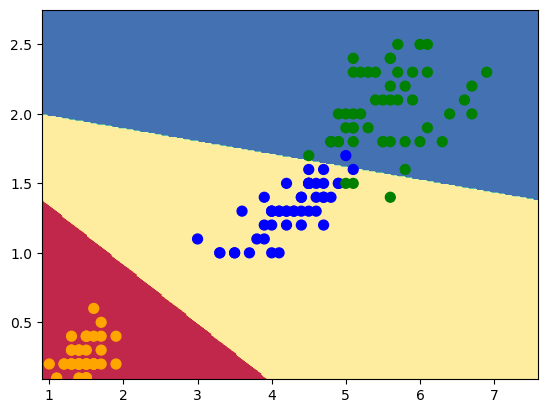

In [5]:
plotTwoFeatures(X, Y, model.predict)

#### d) Gewichte

In [6]:
model.get_weights()

[array([[-1.4874568 , -0.29924157, -0.05047116],
        [-3.0061295 , -0.20464252,  2.4914596 ]], dtype=float32),
 array([ 5.838851 ,  0.8825633, -4.7373986], dtype=float32)]

#### e) Model 2

In [7]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(units=5, activation="tanh"))
model.add(keras.layers.Dense(units=3, activation="softmax", input_shape=(2,)))
model.compile(optimizer="adam", loss="mean_squared_error", metrics=["accuracy"])
model.fit(x=X, y=Y, epochs=2000)

Epoch 1/2000
5/5 [==============================] - 0s 818us/step - loss: 0.2769 - accuracy: 0.3333
Epoch 2/2000
5/5 [==============================] - 0s 825us/step - loss: 0.2729 - accuracy: 0.3333
Epoch 3/2000
5/5 [==============================] - 0s 829us/step - loss: 0.2693 - accuracy: 0.3333
Epoch 4/2000
5/5 [==============================] - 0s 748us/step - loss: 0.2657 - accuracy: 0.3333
Epoch 5/2000
5/5 [==============================] - 0s 826us/step - loss: 0.2629 - accuracy: 0.3333
Epoch 6/2000
5/5 [==============================] - 0s 878us/step - loss: 0.2601 - accuracy: 0.3333
Epoch 7/2000
5/5 [==============================] - 0s 719us/step - loss: 0.2577 - accuracy: 0.3333
Epoch 8/2000
5/5 [==============================] - 0s 796us/step - loss: 0.2555 - accuracy: 0.3267
Epoch 9/2000
5/5 [==============================] - 0s 819us/step - loss: 0.2535 - accuracy: 0.3267
Epoch 10/2000
5/5 [==============================] - 0s 894us/step - loss: 0.2516 - accuracy: 0.3267

2813/2813 [==============================] - 1s 271us/step


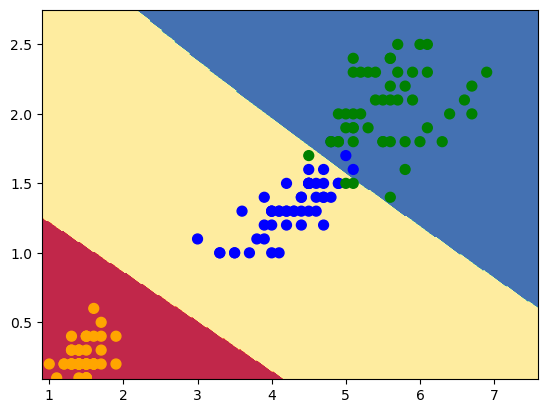

In [8]:
plotTwoFeatures(X, Y, model.predict)

In [9]:
model.get_weights()

[array([[-1.3000588 , -1.4183486 , -0.1708955 ,  0.2967027 , -0.79358035],
        [-0.00817803, -0.03142991, -0.9654687 ,  0.44209698, -2.1842513 ]],
       dtype=float32),
 array([-0.4552927 , -0.51165086,  2.1728413 , -2.0177956 ,  3.5009296 ],
       dtype=float32),
 array([[-0.25539222, -0.36355948,  0.14526427],
        [-0.07192273,  0.27291033, -0.30696502],
        [ 2.395429  ,  1.6959898 , -2.9741137 ],
        [-2.6102982 , -3.037541  ,  4.3814874 ],
        [ 3.2763748 , -1.8884727 ,  0.17297414]], dtype=float32),
 array([-0.32788932,  0.17772982,  0.01839912], dtype=float32)]

Jede Schicht hat ihre eigenen Weights. Hier gibt es zwei Schichten die so aufgebaut sind:

1. Schicht:
5 Neuronen mit je 2 Gewichten für die 2 Inputmerkmale
5 Bias-Werte, für jedes Neuron eins

2. Schicht
3 Neuronen mit je 5 Gewichte, für die 5 Werte aus der vorherigen Schicht
3 Bias Werte, für jedes Neuron eins

## Aufgabe 2

In [10]:
#%matplotlib

def plot_every_10_epochs(epoch, logs):
    return  # methode wird für die Abgabe ignoriert, da die Darstellung im Notebook sonst unübersichtlich wird
    if epoch % 10 == 0:
        plotTwoFeatures(X, Y, model.predict)
    plt.pause(0.05)  # evtl. nötig


nnwplot_cb = keras.callbacks.LambdaCallback(on_epoch_end=plot_every_10_epochs)

Epoch 1/150
5/5 [==============================] - 0s 882us/step - loss: 0.3170 - accuracy: 0.3333
Epoch 2/150
5/5 [==============================] - 0s 867us/step - loss: 0.2994 - accuracy: 0.3333
Epoch 3/150
5/5 [==============================] - 0s 892us/step - loss: 0.2815 - accuracy: 0.3333
Epoch 4/150
5/5 [==============================] - 0s 995us/step - loss: 0.2655 - accuracy: 0.3333
Epoch 5/150
5/5 [==============================] - 0s 727us/step - loss: 0.2496 - accuracy: 0.3333
Epoch 6/150
5/5 [==============================] - 0s 841us/step - loss: 0.2364 - accuracy: 0.3333
Epoch 7/150
5/5 [==============================] - 0s 835us/step - loss: 0.2288 - accuracy: 0.3333
Epoch 8/150
5/5 [==============================] - 0s 808us/step - loss: 0.2209 - accuracy: 0.1933
Epoch 9/150
5/5 [==============================] - 0s 907us/step - loss: 0.2145 - accuracy: 0.2867
Epoch 10/150
5/5 [==============================] - 0s 902us/step - loss: 0.2089 - accuracy: 0.3333
Epoch 11/

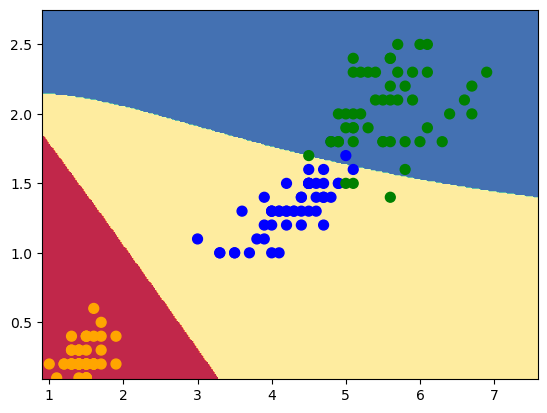

In [11]:
a = keras.Input((2,), name="input")
b = keras.layers.Dense(32, activation="tanh", name="hidden-tanh")(a)
c = keras.layers.Dense(3, activation="softmax", name="output-softmax")(b)
model = keras.models.Model(a, c)
model.compile(optimizer="adam", loss="mean_squared_error", metrics=["accuracy"])
history = model.fit(x=X, y=Y, epochs=150, callbacks=[nnwplot_cb])
#model.predict(X)
plotTwoFeatures(X, Y, model.predict)

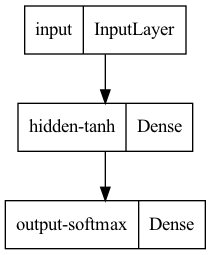

In [15]:
keras.utils.plot_model(model)

In [13]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

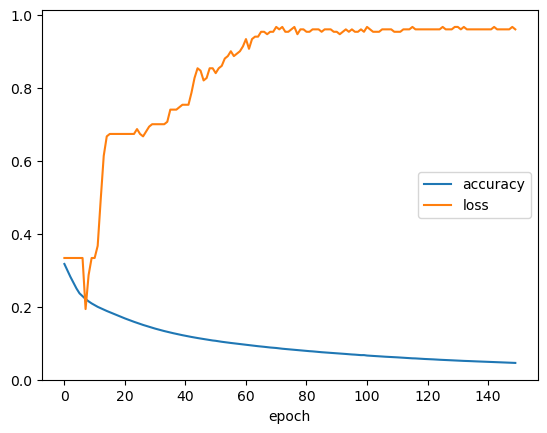

In [14]:
plt.figure()
plt.plot(history.history["loss"]);
plt.plot(history.history["accuracy"])
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='center right')
plt.show()